# Exploring Mushrooms

When asked to think of a mushroom, you might imagine the following:

![this shows a photo of some generic button mushrooms in a forest.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/generic_mushroom.jpg)

It's a beige, convex mushroom top with a uniform, thick stem. Maybe you thought of it cut up on a slice of delicious pizza or braised with sauce over rice. Regardless, you most likely did not consider this:

![A photo of some beautiful mushrooms in a forest. They do not have the signature "mushroom top" and have visually appealing grooves that make them look almost like floral.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/pretty_mushroom.jpg)

Mushrooms exist in a variety of different colors, shapes, sizes, textures, etc. In this project, you will analyze an extensive mushroom dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom) using bar charts and acquaint yourself with the diverse array of mushrooms that exist worldwide.

## Looking Over the Data

1. We've loaded **mushroom_data.csv**. It contains 23 columns of data describing thousands of mushrooms. 

    This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. 

    The dataset is collected from [Kaggle](https://www.kaggle.com/uciml/mushroom-classification). It may be helpful to read through the table to get a sense of the types(s) of variables in the data and the structure of the table. 
   
   Before we move on to plotting any of this data, let's answer the following questions:
   * What type(s) of variables does **mushroom_data.csv** contain?
   * How many of the variables can we visualize effectively with a bar graph?

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load in the data
df = pd.read_csv("./mushroom_data.csv")
df.head()

,Class,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,Poisonous,Convex,Smooth,Brown,True,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,True,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,True,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,True,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Gray,False,None,Free,Crowded,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


2. a. There are 23 variables in this dataset (one for each column). One of them (the `Bruises` variable) has `True` or `False` responses. Just to be safe let's convert it into object by using `.astype()`

In [5]:
df["Bruises"] = df["Bruises"].astype('object')
df.dtypes

Class                       object
Cap Shape                   object
Cap Surface                 object
Cap Color                   object
Bruises                     object
Odor                        object
Gill Attachment             object
Gill Spacing                object
Gill Size                   object
Gill Color                  object
Stalk Shape                 object
Stalk Root                  object
Stalk Surface Above Ring    object
Stalk Surface Below Ring    object
Stalk Color Above Ring      object
Stalk Color Below Ring      object
Veil Type                   object
Veil Color                  object
Ring Number                 object
Ring Type                   object
Spore Print Color           object
Population                  object
Habitat                     object
dtype: object

## Inspecting `unique` values for each `column`

2. b. Now, all our variables are of `object` types, which means we can graph them. Graphing each one individually would be tedious; instead, we're going to use loops.

   In the code block below, you will see an attribute called `columns`. This attribute returns the name of each variable in **mushroom_data.csv**. Next we're going to:
   - Create a loop that traverses each `column` in the `columns` list.
   - Print each `column` in `columns` 
   - Print `unique` value in each `column` 

In [6]:
# list of all column headers
columns = df.columns.tolist()

for column in columns:
  print(column, df[column].unique())



Class ['Poisonous' 'Edible']
Cap Shape ['Convex' 'Bell' 'Sunken' 'Flat' 'Knobbed' 'Conical']
Cap Surface ['Smooth' 'Scaly' 'Fibrous' 'Grooves']
Cap Color ['Brown' 'Yellow' 'White' 'Gray' 'Red' 'Pink' 'Buff' 'Purple' 'Cinnamon'
 'Green']
Bruises [True False]
Odor ['Pungent' 'Almond' 'Anise' 'None' 'Foul' 'Creosote' 'Fishy' 'Spicy'
 'Musty']
Gill Attachment ['Free' 'Attached']
Gill Spacing ['Close' 'Crowded']
Gill Size ['Narrow' 'Broad']
Gill Color ['Black' 'Brown' 'Gray' 'Pink' 'White' 'Chocolate' 'Purple' 'Red' 'Buff'
 'Green' 'Yellow' 'Orange']
Stalk Shape ['Enlarging' 'Tapering']
Stalk Root ['Equal' 'Club' 'Bulbous' 'Rooted' 'Missing']
Stalk Surface Above Ring ['Smooth' 'Fibrous' 'Silky' 'Scaly']
Stalk Surface Below Ring ['Smooth' 'Fibrous' 'Scaly' 'Silky']
Stalk Color Above Ring ['White' 'Gray' 'Pink' 'Brown' 'Buff' 'Red' 'Orange' 'Cinnamon' 'Yellow']
Stalk Color Below Ring ['White' 'Pink' 'Gray' 'Buff' 'Brown' 'Red' 'Yellow' 'Orange' 'Cinnamon']
Veil Type ['Partial']
Veil Color ['W

3. In the output above, you should see 23 column names pop up starting with `class` and ending with `habitat`.
   
   Now we can plot our data using the `.countplot()` method from the seaborn library for bar chart, and `.pie()` method from matplotlib library.

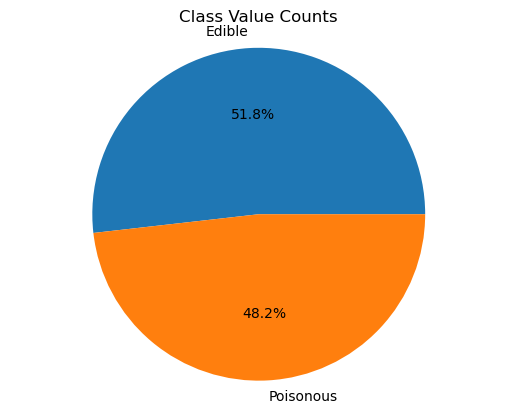

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


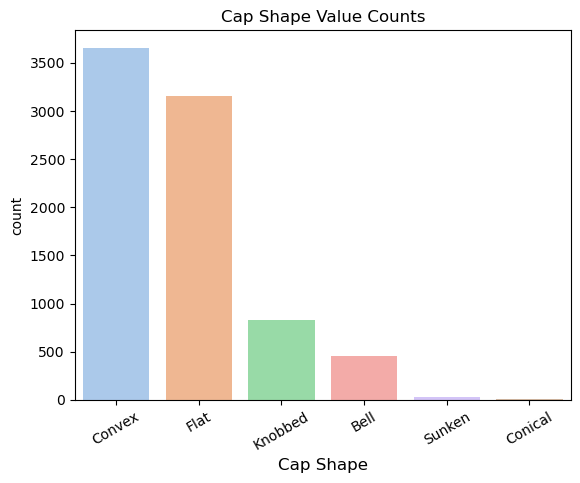

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


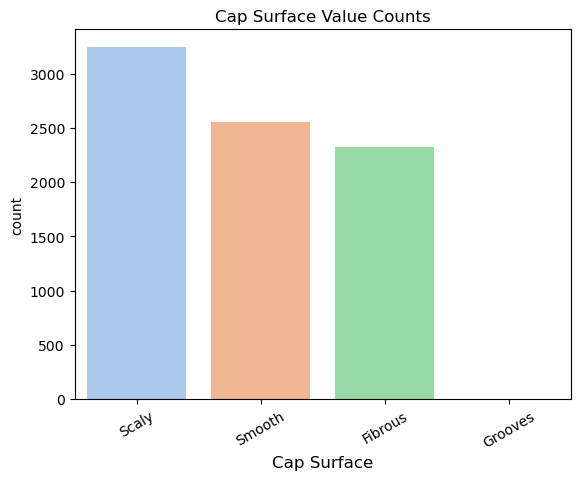

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


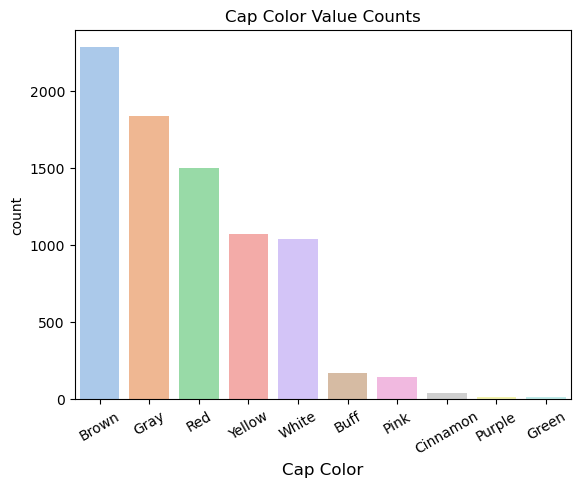

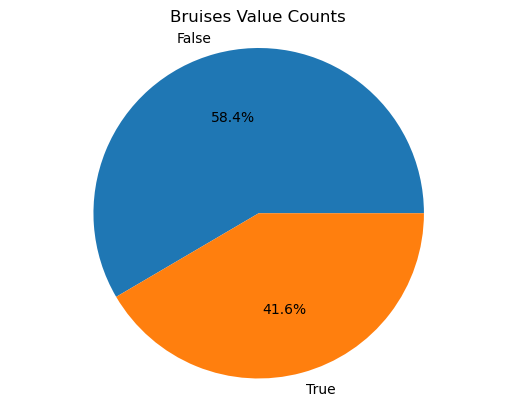

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


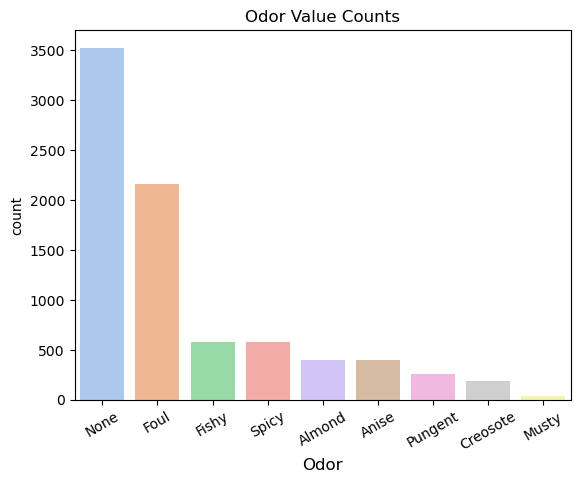

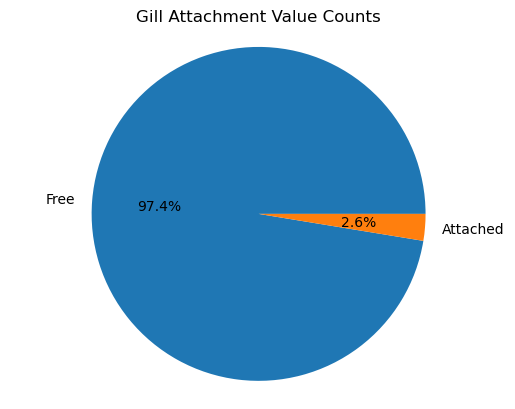

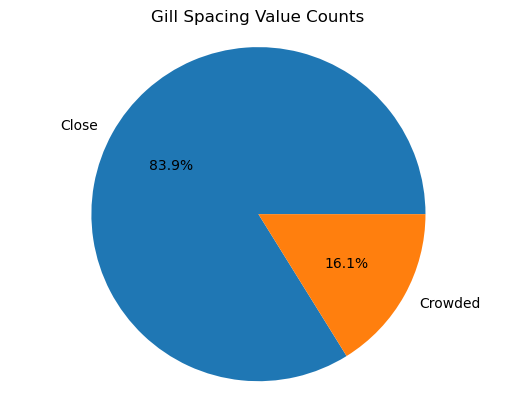

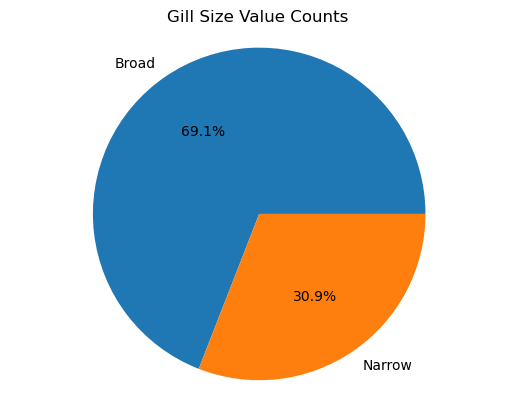

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


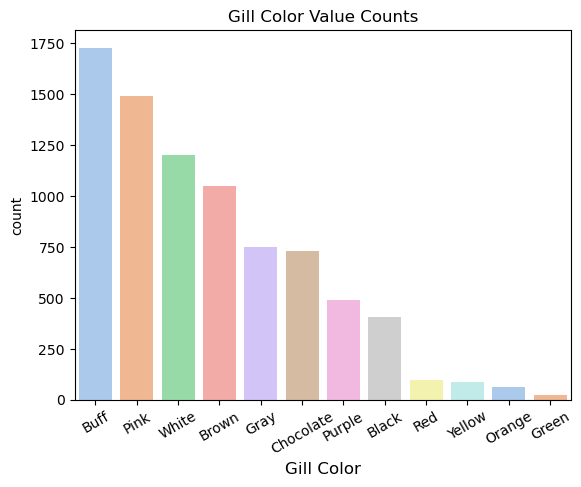

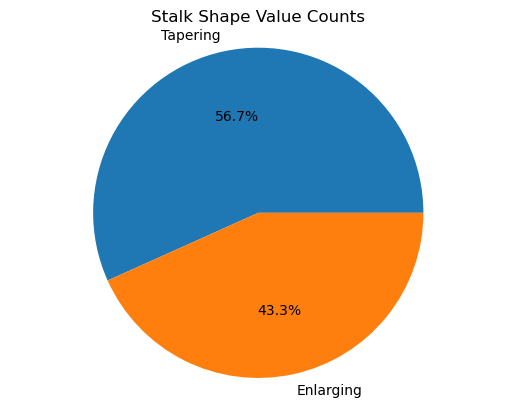

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


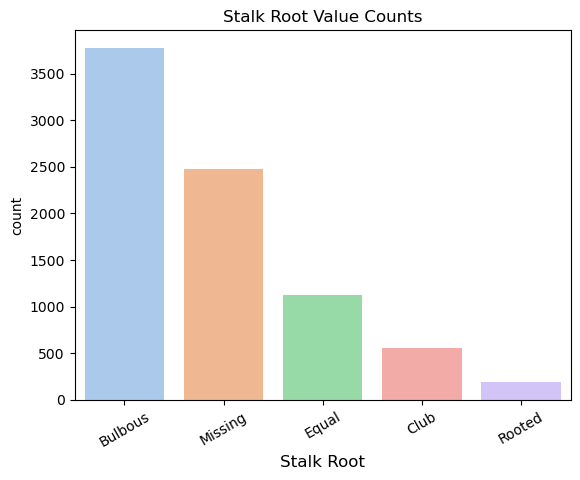

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


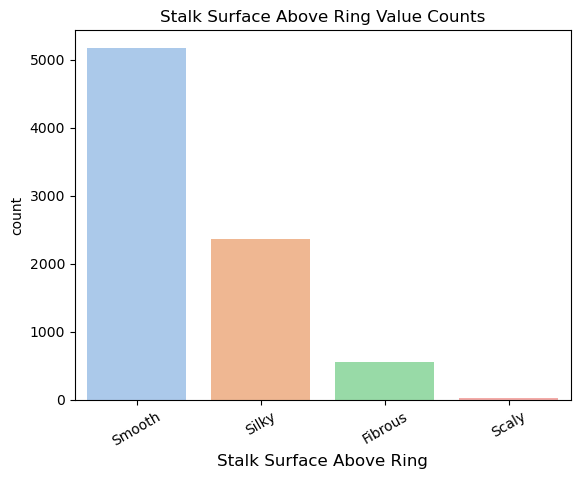

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


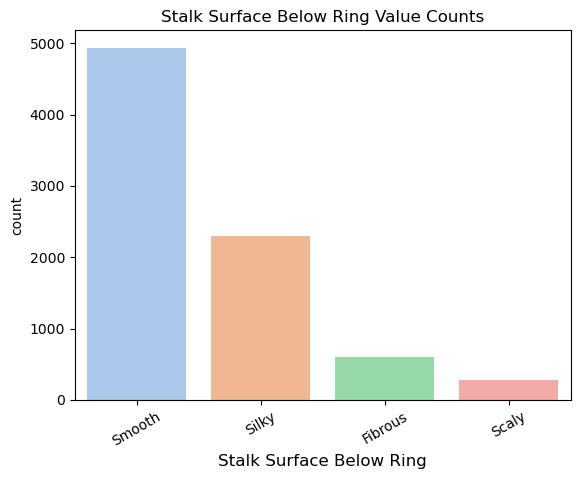

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


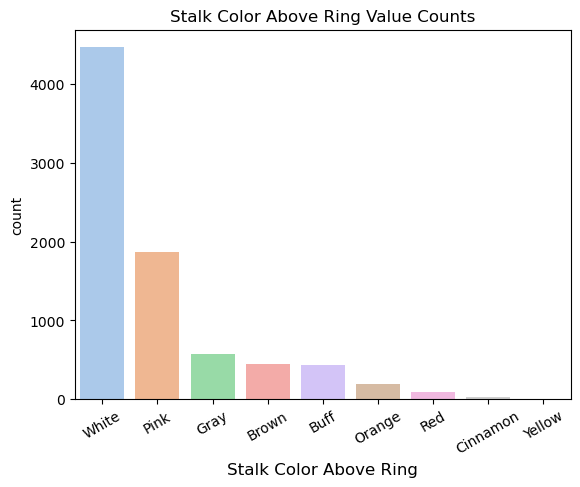

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


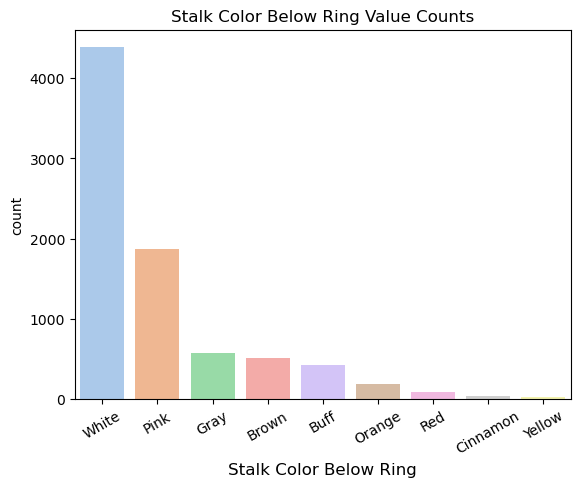

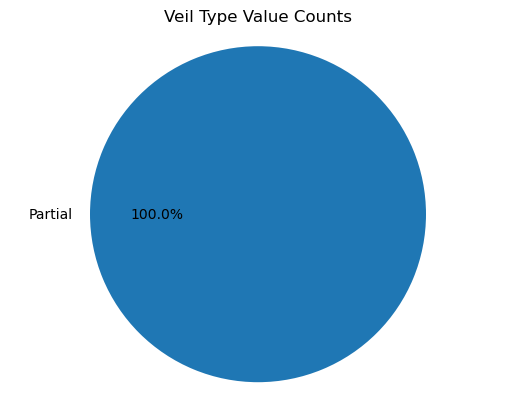

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


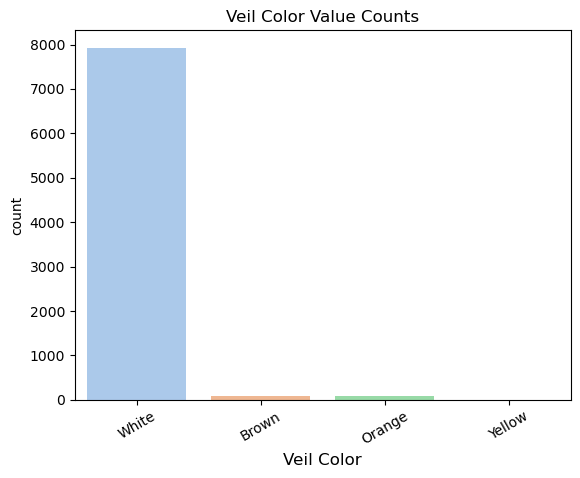

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


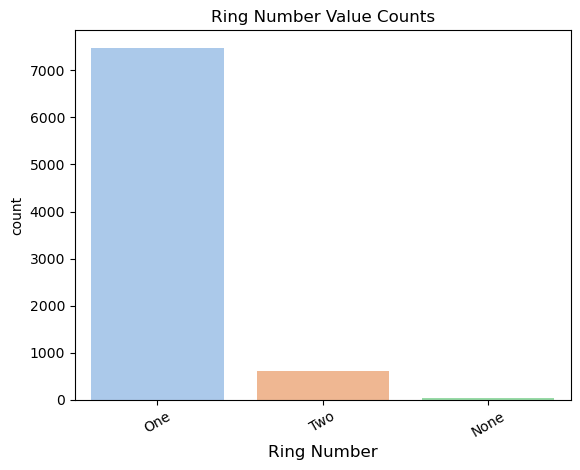

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


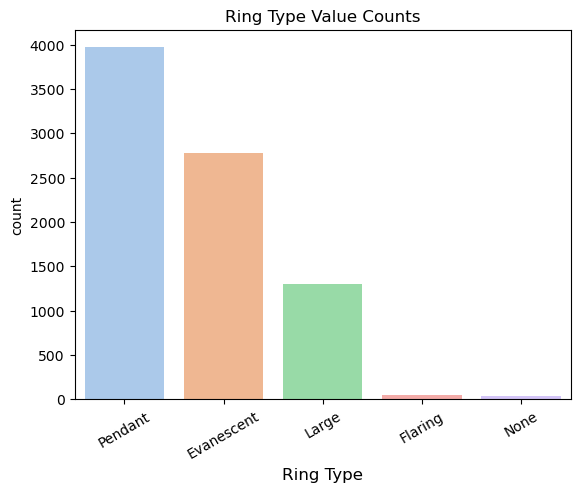

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


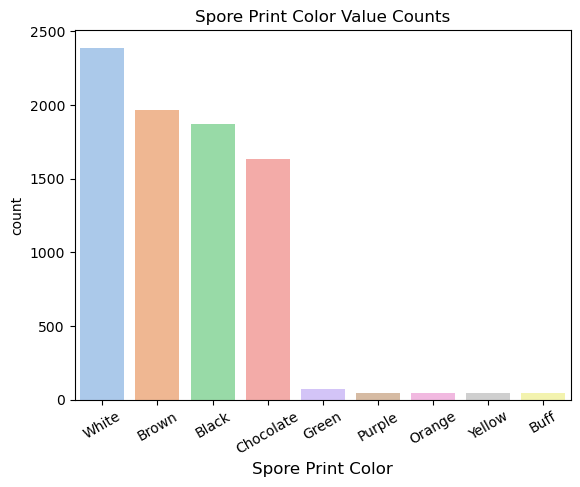

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


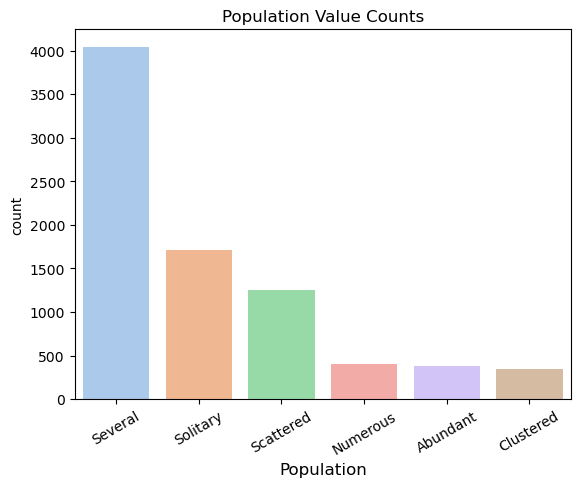

/Users/izam_ghali18/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


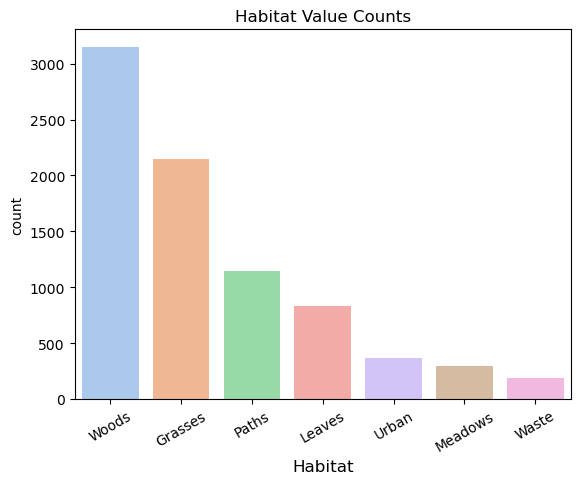

<Figure size 640x480 with 0 Axes>

In [9]:
for column in columns:
  # turning bar graph with less than 3 bars into pie chart
    if len(df[column].unique()) < 3:
        column_name = df[column].value_counts(normalize=True).reset_index()
        prop = column_name[column]
        label = column_name['index']
        plt.pie(prop, labels=label, autopct='%0.1f%%')
        plt.axis('equal')
    else:
        # plotting the bar, setting the color, and adjusting the plot order
        sns.countplot(df[column], palette='pastel', order=df[column].value_counts().index)

        # adjusting the tick rotation and size of the label
        plt.xticks(rotation=30, fontsize=10)
        plt.xlabel(column, fontsize=12)
    
    # adding title to the graph
    plt.title(column + " Value Counts")

    # 4 adding show() and clf()
    plt.show()
    plt.clf()

4. Let's make sense what we just did. Above we use `for` loops to iterate each column. Inside the loop, we put `if` statement so that column that value less than 3, will be plotted using `plt.pie()` method to display pie chart. 

## Plotting the Pie Chart

5. Inside the `if` code block, we define: 
    
    a. `column_name` which refers to proportion table for each column. If we printed `column_name`, we should see table consisting of index column(with the variable as the value) and proportion column(with each proportion for each variable)
    
    b. `prop` refers to the proportion column in `column_name`
    
    c. `label` refers to the variables in index column in `column_name` table

6. We use `plt.pie()` to create pie chart. `prop` and `label` variables are passed as arguments inside `plt.pie()`. Then we use `plt.axis('equal')` to make pie chart not tilted. 

## Ordering the Bars & Setting the bar color

7. If a column has more than 3 value, it will be plotted as bar chart in `else` code block. Inside it, we use `sns.countplot()` to plot the bar chart. We pass `df[column]` as the first argument for the x-values in the bar.

    Next, we use keyword `palette='pastel'` to adjust the color, so it's softer, rather than using the default color.
    
    We also passed in `order=df[column].value_counts()`, this will adjust the order of the bar in descending order, meanwhile `.index()` specifies the row labels of the DataFrame. 

## Cleaning the Bar Graphs

   8. For better readability, we adjust the x-tick labels to rotate 30 degree using `rotation=30` so that the tick labels don't overlap each other, and `fontsize=10` as keyword arguments passed into `plt.xticks()`. 
   
    As for the x-value label, we passed `column` for the label, and set the `fontsize=12`.
    
    To give context and informative title for each bar, we iterate `plt.title()` with loop variable `column` as argument, and concatenate that with `string` `"Value Counts"`.

   9. At the end of our`for` loop, to display the charts, we added:

   ```py
   plt.show()
   plt.clf()
   ```
   
   With `.show()` Matplotlib method we display the all the charts. And [`.clf()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.clf.html) method from Matplotlib library, clears any previous figure formatting. This will keep any graphs we are plotting from bunching up on each other, so our plots will be neatly stacked on top of each other with spacing ideal for viewing.

## Ready for analysis

10. After using `plt.show()` and `plt.clf()`, 23 plots should appear in the output below the previous code block. If we scroll through each of the graphs, we can see what sort of different trends.
   - What variables have an obvious mode?
   - Do any of them have a notably diverse array of values?
   - What habitat are you most likely to find mushrooms in?
   
   What questions did you have before seeing the graphs? What questions are popping up now that you see them?

11. Great job! We have created 23 informative plots. Now that they are clean, labeled clearly, and ordered, we can really dive for further analysis.

    It is easy to tell which features of mushrooms are most common and rare, and we get insights into the variety of mushrooms in the fungi kingdom.
   
   Here are some insights we get from the graphs:
   - It is a roughly equal split between mushrooms that are edible vs. poisonous.
   - The majority of mushrooms in this dataset have a scaly surface.
   - There are a non-insignificant amount of mushrooms that give off an almond scent?!!!
   - Most top surfaces of mushrooms in this dataset are scaly rather than smooth.